#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate



In [22]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history_BINCROSSEN=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)   

Epoch 1/12
293/293 [==============================] - 86s 295ms/step - loss: 0.3248 - accuracy: 0.1204 - val_loss: 0.3214 - val_accuracy: 0.1841
Epoch 2/12
293/293 [==============================] - 86s 293ms/step - loss: 0.3198 - accuracy: 0.1553 - val_loss: 0.3185 - val_accuracy: 0.2213
Epoch 3/12
293/293 [==============================] - 90s 308ms/step - loss: 0.3150 - accuracy: 0.1832 - val_loss: 0.3146 - val_accuracy: 0.2482
Epoch 4/12
293/293 [==============================] - 82s 280ms/step - loss: 0.3097 - accuracy: 0.2044 - val_loss: 0.3100 - val_accuracy: 0.2702
Epoch 5/12
293/293 [==============================] - 90s 306ms/step - loss: 0.3038 - accuracy: 0.2280 - val_loss: 0.3050 - val_accuracy: 0.2847
Epoch 6/12
293/293 [==============================] - 91s 311ms/step - loss: 0.2979 - accuracy: 0.2490 - val_loss: 0.3009 - val_accuracy: 0.2970
Epoch 7/12
293/293 [==============================] - 87s 296ms/step - loss: 0.2939 - accuracy: 0.2658 - val_loss: 0.2973 - val_ac

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

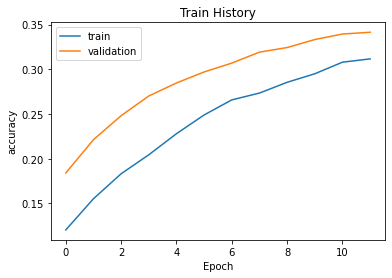

In [24]:
show_train_history(train_history_BINCROSSEN,'accuracy','val_accuracy')

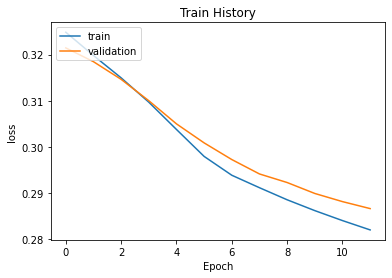

In [25]:
show_train_history(train_history_BINCROSSEN,'loss','val_loss')

In [26]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history_MSE=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)    

Epoch 1/12
293/293 [==============================] - 81s 276ms/step - loss: 0.0804 - accuracy: 0.3215 - val_loss: 0.0818 - val_accuracy: 0.3473
Epoch 2/12
293/293 [==============================] - 87s 297ms/step - loss: 0.0802 - accuracy: 0.3242 - val_loss: 0.0817 - val_accuracy: 0.3492
Epoch 3/12
293/293 [==============================] - 94s 320ms/step - loss: 0.0801 - accuracy: 0.3255 - val_loss: 0.0815 - val_accuracy: 0.3509
Epoch 4/12
293/293 [==============================] - 90s 306ms/step - loss: 0.0800 - accuracy: 0.3267 - val_loss: 0.0813 - val_accuracy: 0.3527
Epoch 5/12
293/293 [==============================] - 86s 294ms/step - loss: 0.0797 - accuracy: 0.3304 - val_loss: 0.0812 - val_accuracy: 0.3547
Epoch 6/12
293/293 [==============================] - 101s 344ms/step - loss: 0.0796 - accuracy: 0.3315 - val_loss: 0.0811 - val_accuracy: 0.3577
Epoch 7/12
293/293 [==============================] - 97s 330ms/step - loss: 0.0795 - accuracy: 0.3327 - val_loss: 0.0809 - val_a

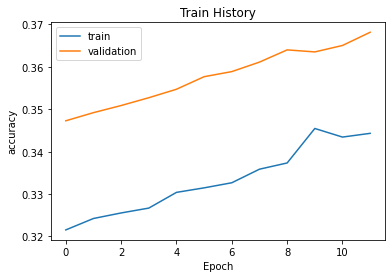

In [27]:
show_train_history(train_history_MSE,'accuracy','val_accuracy')

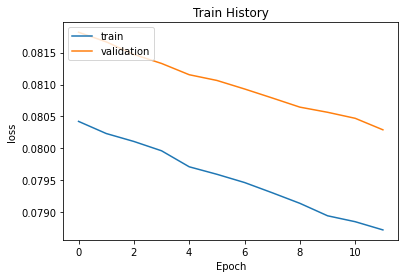

In [28]:
show_train_history(train_history_MSE,'loss','val_loss')